# Assignment 1: Analysis of the Netflix Dataset

***Dataset:*** "Netflix Movies and TV Shows" on Kaggle (`netflix_titles.csv`)  
https://www.kaggle.com/datasets/shivamb/netflix-shows is the dataset page.

This notebook analyzes the Netflix Movies and TV Shows dataset to look into trends in the streaming service's content library. Specifically, it examines how the number of titles added to Netflix has evolved over time and compares movies and TV series based on their length and content ratings.
## Data Dictionary
The Netflix titles dataset contains the following columns:
- `show_id`: Unique identifier for each title
- `type`: Indicates whether the title is a Movie or TV Show
- `title`: Name of the movie or TV show
- `director`: Director(s) of the title
- `cast`: Main cast members
- `country`: Country or countries of production
- `date_added`: Date the title was added to Netflix
- `release_year`: Year the title was originally released
- `rating`: Content rating (e.g., PG, PG-13, TV-MA)
- `duration`: Runtime in minutes for Movies or number of seasons for TV Shows
- `listed_in`: Genre(s) or category labels
- `description`: Brief description of the title
### Columns Used in This Analysis
This analysis focuses on the following columns:
- `type`
- `date_added`
- `release_year`
- `rating`
- `duration`
## Queries: 
1. How many new titles have been added to Netflix over time, broken down by year?
2. Is the average runtime or distribution of ratings different for TV shows and movies?

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/netflix/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


----
## 2. Data Cleaning 

In [15]:
def clean_duration(row):
    """
    Extracts the numeric value from the duration column.
    For Movies, returns the number of minutes (e.g., '90 min' -> 90).
    For TV Shows, returns the number of seasons (e.g., '2 Seasons' -> 2).
    Returns NaN if the duration is missing or cannot be parsed.
    """
    duration = row["duration"]
    if pd.isna(duration):
        return np.nan
    # Split the string and take the first part (the number)
    parts = str(duration).split(" ")
    try:
        return int(parts[0])
    except ValueError:
        return np.nan

In [16]:
# Drop duplicate rows if any
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()

# Drop rows missing critical columns for our analysis
df = df.dropna(subset=["title", "type", "duration"])

# Convert date_added to datetime and extract year
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year

# Apply the clean_duration function to extract numeric duration
df["duration_num"] = df.apply(clean_duration, axis=1)

# Fill missing ratings with "Unknown" so they are not lost
df["rating"] = df["rating"].fillna("Unknown")

# Display cleaned dataset info
print("\nCleaned dataset shape:", df.shape)
print("\nMissing values after cleaning:")
print(df[["type", "date_added", "year_added", "duration", "duration_num", "rating"]].isna().sum())

Duplicates found: 0

Cleaned dataset shape: (8804, 14)

Missing values after cleaning:
type             0
date_added      98
year_added      98
duration         0
duration_num     0
rating           0
dtype: int64


**Note:** Missing `rating` values were filled with "Unknown" as placeholders. These are treated as a separate category and may be excluded from specific analyses when appropriate (Query 2). Rows missing `duration` were dropped since duration is essential for our second research question.

---

## 3. Analysis

### Analysis 1 — Trend Over Time: Titles Added per Year

This analysis groups titles by the year they were added to Netflix (using `date_added`) and counts how many were added each year. This helps answer **Query 1**: How has the number of titles added to Netflix changed over time?

In [17]:
# Group by year_added and count titles (ignoring rows with missing dates)
added_per_year = df.dropna(subset=["year_added"]).groupby("year_added").size()
print("Titles added per year:")
print(added_per_year)

Titles added per year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     416
2017.0    1163
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
dtype: int64


### Analysis 2 — Comparison of Two Groups: Movies vs. TV Shows

This analysis compares Movies and TV Shows across two dimensions to answer **Query 2**:
1. **Duration**: Average runtime in minutes for Movies vs. average number of seasons for TV Shows.
2. **Ratings distribution**: How content ratings differ between the two types.

In [18]:
# Separate Movies and TV Shows
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]

# Summary stats for duration by type
print("Movie duration (minutes) summary:")
print(movies["duration_num"].describe())
print("\nTV Show duration (seasons) summary:")
print(tv_shows["duration_num"].describe())

Movie duration (minutes) summary:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_num, dtype: float64

TV Show duration (seasons) summary:
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_num, dtype: float64


In [19]:
# Ratings distribution for Movies vs TV Shows (excluding "Unknown")
df_known_rating = df[df["rating"] != "Unknown"]

# Get the top ratings to keep the comparison readable
top_ratings = df_known_rating["rating"].value_counts().head(8).index.tolist()
df_top_ratings = df_known_rating[df_known_rating["rating"].isin(top_ratings)]

# Crosstab of type vs rating
rating_crosstab = pd.crosstab(df_top_ratings["rating"], df_top_ratings["type"])
print("Ratings distribution (Movies vs TV Shows):")
print(rating_crosstab)

Ratings distribution (Movies vs TV Shows):
type    Movie  TV Show
rating                
PG        287        0
PG-13     490        0
R         797        2
TV-14    1427      733
TV-MA    2062     1145
TV-PG     540      323
TV-Y      131      176
TV-Y7     139      195


---

## 4. Visualization

### Plot 1 Relationship Plot: Titles Added to Netflix Over Time (by Year and Type)

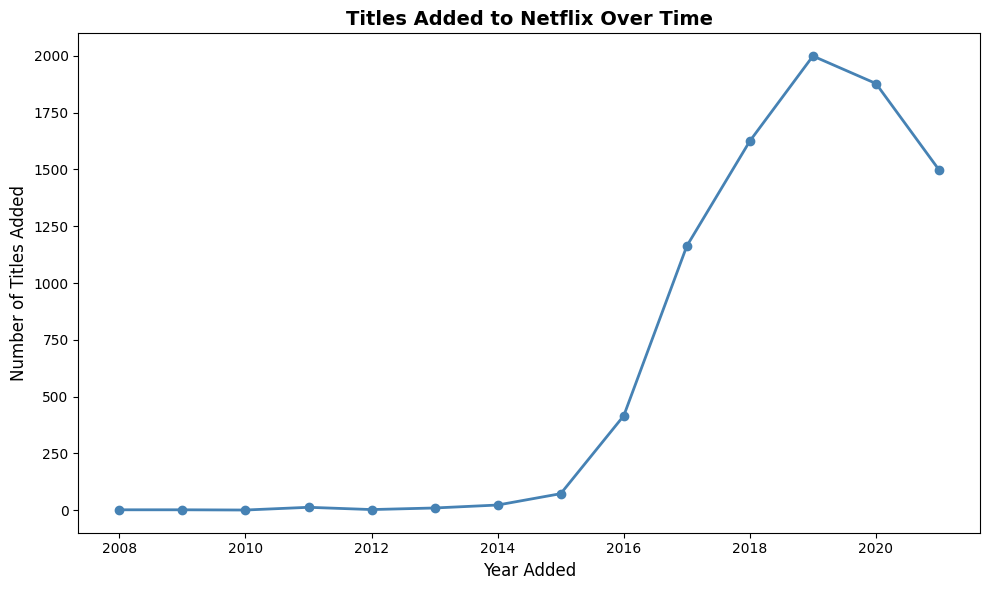

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(added_per_year.index, added_per_year.values, marker="o", linewidth=2, color="steelblue")
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.title("Titles Added to Netflix Over Time", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**Interpretation**: Based on the line chart above, we can see that Netflix began adding more titles to their platform from 2015 to 2019, showing that there was a huge amount of content growth during those years. There is also an evident drop from 2019 to 2021, where it was no longer adding titles to the catalog, likely due to the major COVID crisis during 2020. Overall, this chart shows that Netflix was prioritizing expanding its catalog during the peak years of the platform.

### Plot 2   Distribution Plot: Duration of Movies (minutes) and TV Shows (seasons)

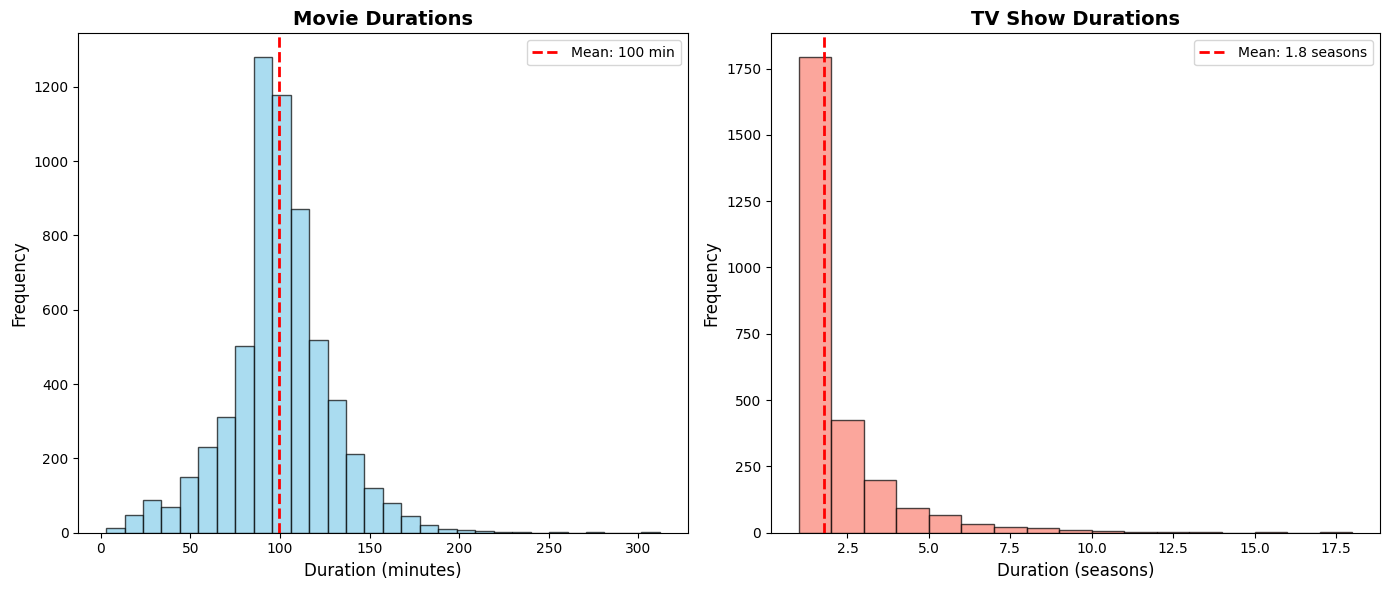

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Movie durations in minutes
axes[0].hist(movies["duration_num"].dropna(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
axes[0].axvline(movies["duration_num"].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean: {movies['duration_num'].mean():.0f} min")
axes[0].set_xlabel("Duration (minutes)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Movie Durations", fontsize=14, fontweight="bold")
axes[0].legend()

# Right: TV Show durations in seasons
axes[1].hist(tv_shows["duration_num"].dropna(), bins=range(1, int(tv_shows["duration_num"].max()) + 2), color="salmon", edgecolor="black", alpha=0.7)
axes[1].axvline(tv_shows["duration_num"].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean: {tv_shows['duration_num'].mean():.1f} seasons")
axes[1].set_xlabel("Duration (seasons)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("TV Show Durations", fontsize=14, fontweight="bold")
axes[1].legend()

plt.tight_layout()
plt.show()

**Interpretation**: Comparing the durations of both Movies and TV Series on Netflix with side-by-side histograms reveals two very different pictures. Movies mostly lie in the 80-120 minute range (mean: approximately 100 minutes) with longer durations having a tail that is skewed to the right side. By comparison, there are few Series that exceed 3-4 Seasons. This suggests that Netflix’s library of Series is more concentrated at the lower end of their total available length than the Movies, resulting in a greater variety of runtimes in the Movie Library than in its Series Library.

### Plot 3 Distribution Plot: Ratings Distribution for Movies vs TV Shows

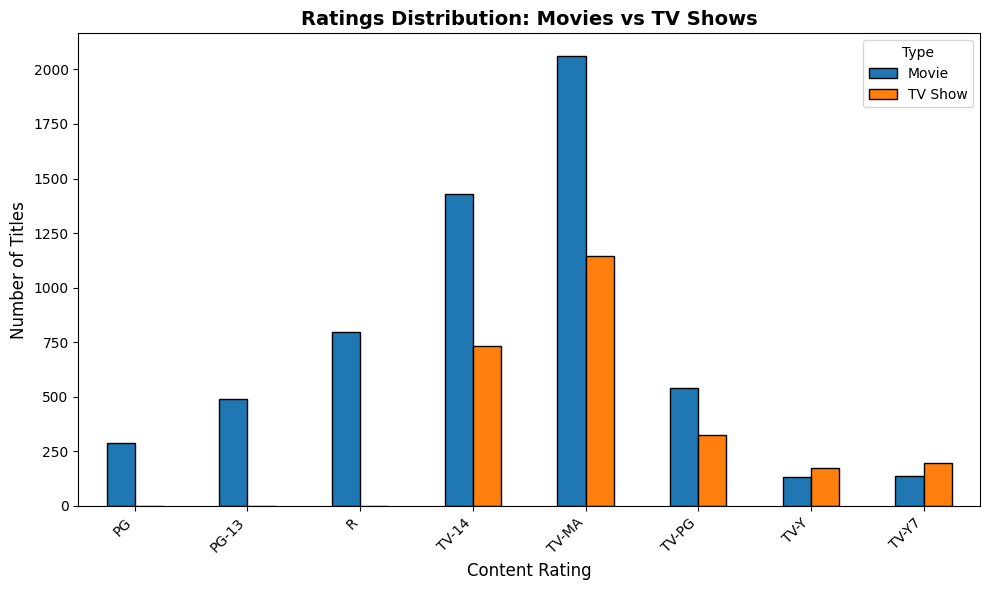

In [22]:
# Plot grouped bar chart of top ratings by type
rating_crosstab.plot(kind="bar", figsize=(10, 6), edgecolor="black")
plt.xlabel("Content Rating", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Ratings Distribution: Movies vs TV Shows", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

**Interpretation**: The grouped bar chart shows that TV-MA is the most common rating for both Movies and TV Shows, indicating that Netflix's catalog skews toward mature content. Movies dominate in ratings like R and PG-13, while TV Shows appear more concentrated in TV-MA and TV-14. This suggests that TV Shows on Netflix tend to be rated for older audiences, while movies have a slightly broader range of content ratings.

---